# Chapter 15-2 ARIMA

http://www.statsmodels.org/stable/tsa.html

http://ucanalytics.com/blogs/wp-content/uploads/2017/08/ARIMA-TimeSeries-Analysis-of-Tractor-Sales.html

# 1.平稳时间序列分析-ARMA模型

## 1.1 AR

In [1]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

C:\Users\ben\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#dta=AR
ts_simu200= pd.read_csv('ts_simu200.csv',index_col='t')
dates=pd.date_range(start='2017/01/01', periods=200)
ts_simu200.set_index(dates, inplace=True)
dta=ts_simu200['AR1_a']

2017-01-01   -1.792035
2017-01-02   -0.743791
2017-01-03    0.644999
2017-01-04   -0.370990
2017-01-05   -0.779197
Freq: D, Name: AR1_a, dtype: float64

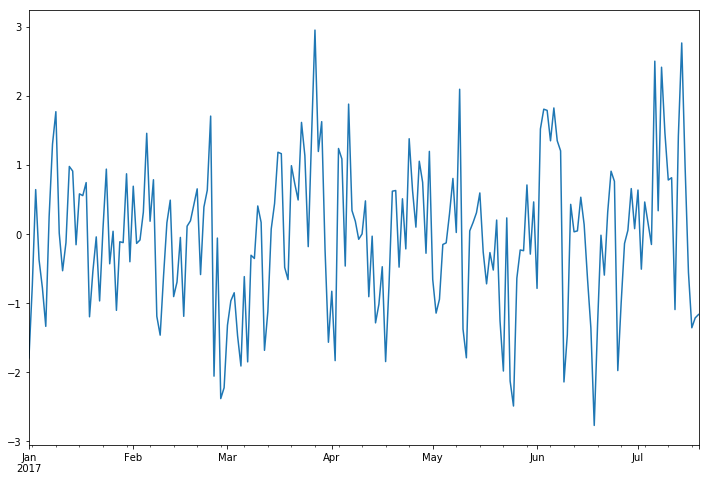

In [3]:
dta.plot(figsize=(12,8))
plt.show()

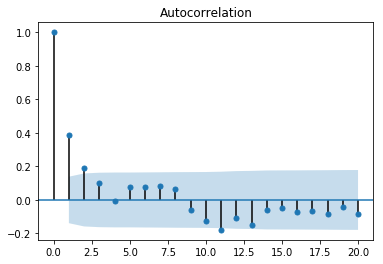

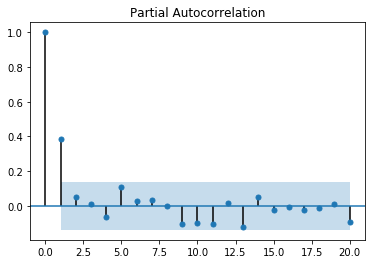

In [4]:
#自相关和偏自相关
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(dta,lags=20)#lags 表示滞后的阶数
fig = sm.graphics.tsa.plot_pacf(dta,lags=20)
plt.show()

In [2]:
ar10 = sm.tsa.ARMA(dta,(1,0)).fit()

NameError: name 'dta' is not defined

In [ ]:
#检验下残差序列：
resid = ar10.resid
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
fig = sm.graphics.tsa.plot_pacf(resid, lags=20)
plt.show()

2.02904781002
NormaltestResult(statistic=0.98495815375830975, pvalue=0.61110952724677658)


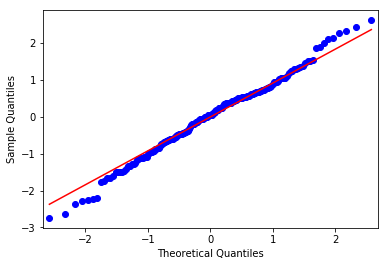

In [6]:
#残差的ACF和PACF图，可以看到序列残差基本为白噪声

#进一步进行D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。
#DW＝４＜＝＞ρ＝－１　即存在负自相关性
#DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性
#因此，当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。

print(sm.stats.durbin_watson(ar10.resid.values))
#观察是否符合正态分布,这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
fig = qqplot(resid, line='q', fit=True)
plt.show()
#结果表明基本符合正态分布

In [7]:
predict_dta = ar10.forecast(steps=5)
import datetime
fig = ar10.plot_predict(pd.to_datetime('2017-01-01')+datetime.timedelta(days=190),
                        pd.to_datetime('2017-01-01')+datetime.timedelta(days=220), dynamic=False, plot_insample=True)
plt.show()

(array([-0.48197719, -0.21456698, -0.10962002, -0.06843287, -0.05226869]),
 array([ 0.98553261,  1.05871266,  1.06953912,  1.07119692,  1.07145203]),
 array([[-2.41358561,  1.44963123],
        [-2.28960567,  1.86047172],
        [-2.20587818,  1.98663815],
        [-2.16794024,  2.03107451],
        [-2.15227607,  2.04773869]]))

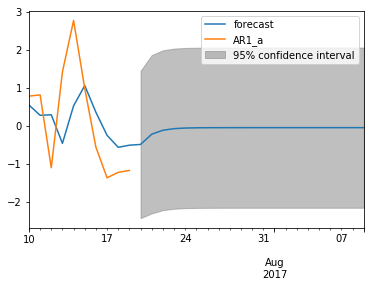

## 1.2 MA

In [9]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [10]:
#dta=MA
ts_simu200= pd.read_csv('ts_simu200.csv',index_col='t')
dates=pd.date_range(start='2017/01/01', periods=200)
ts_simu200.set_index(dates, inplace=True)
dta=ts_simu200['MA1_a']

2017-01-01    1.951711
2017-01-02    0.407913
2017-01-03   -1.375231
2017-01-04   -0.556760
2017-01-05    1.539875
Freq: D, Name: MA1_a, dtype: float64

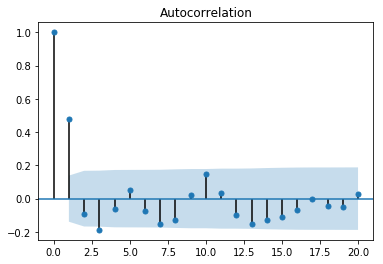

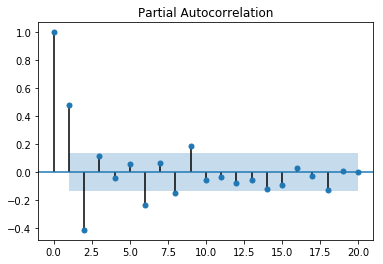

In [11]:
#自相关和偏自相关
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(dta,lags=20)#lags 表示滞后的阶数
fig = sm.graphics.tsa.plot_pacf(dta,lags=20)

In [ ]:
ma01 = sm.tsa.ARMA(dta,(0,1)).fit()

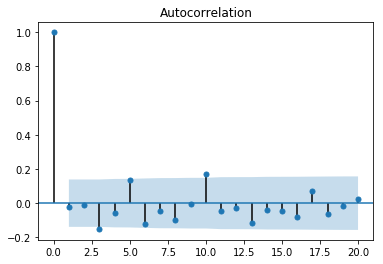

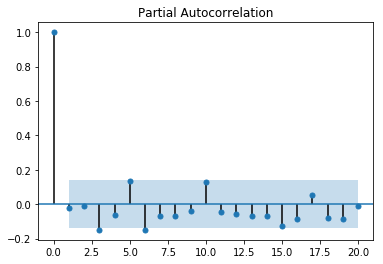

In [12]:
#检验下残差序列：
resid = ma01.resid
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
fig = sm.graphics.tsa.plot_pacf(resid, lags=20)
plt.show()

2.0146411512
NormaltestResult(statistic=1.8712343914493257, pvalue=0.39234363797234562)


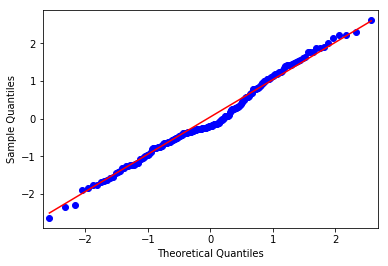

In [13]:
#进一步进行D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。
#DW＝４＜＝＞ρ＝－１　即存在负自相关性
#DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性
#因此，当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。

print(sm.stats.durbin_watson(ma01.resid.values))
#观察是否符合正态分布,这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
fig = qqplot(resid, line='q', fit=True)
plt.show()
#结果表明基本符合正态分布

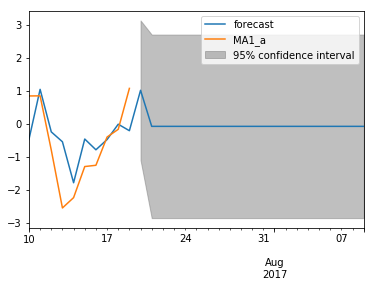

In [14]:
import datetime
fig = ma01.plot_predict(pd.to_datetime('2017-01-01'),
                        pd.to_datetime('2017-01-01')+datetime.timedelta(days=220), 
                        dynamic=False, plot_insample=True)
plt.show()

### 1.3 ARMA

In [3]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [4]:
#dta=ARMA
ts_simu200= pd.read_csv('ts_simu200.csv',index_col='t')
dates=pd.date_range(start='2017/01/01', periods=200)
ts_simu200.set_index(dates, inplace=True)
dta=ts_simu200['ARMA_11_b']
dta.head()

2017-01-01    1.356889
2017-01-02    2.027196
2017-01-03    2.457974
2017-01-04    3.265816
2017-01-05    3.081810
Freq: D, Name: ARMA_11_b, dtype: float64

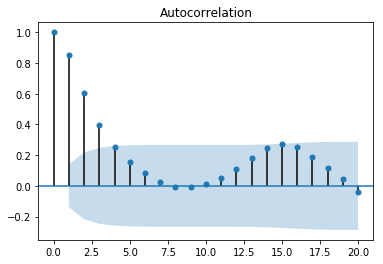

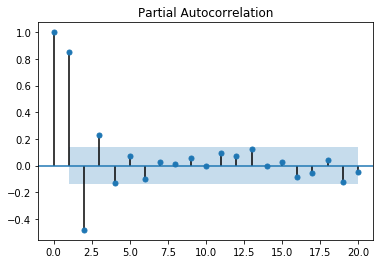

In [5]:
#自相关和偏自相关
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(dta,lags=20)#lags 表示滞后的阶数
fig = sm.graphics.tsa.plot_pacf(dta,lags=20)
plt.show()

In [6]:
import warnings
import itertools
# 设置自相关(AR)、差分(I)、移动平均(MA)的三个参数的取值范围
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
# 忽略ARIMA模型无法估计出结果时的报警信息
import sys
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    try:
        temp_model = sm.tsa.ARIMA(dta,param)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal
    except:
        continue
        
print("Best ARIMA{} model - AIC:{}".format(best_pdq, best_aic))

Best ARIMA(1, 0, 1) model - AIC:594.4262237292969


In [7]:
arma11 = sm.tsa.ARMA(dta,(1,1)).fit()

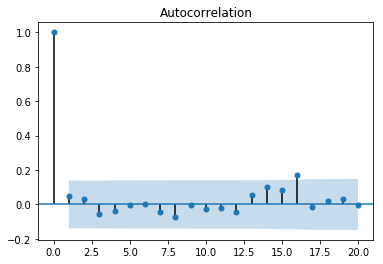

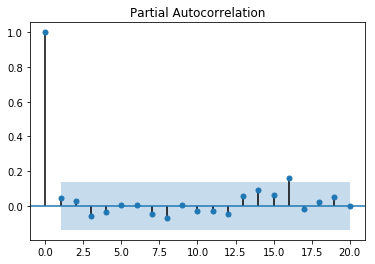

In [8]:
#检验下残差序列：
resid = arma11.resid
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
fig = sm.graphics.tsa.plot_pacf(resid, lags=20)
plt.show()

1.89875622636
NormaltestResult(statistic=8.1477653742264309, pvalue=0.01701121090779319)


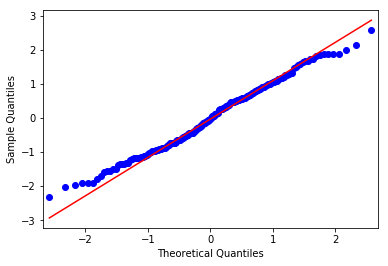

In [18]:
#残差的ACF和PACF图，可以看到序列残差基本为白噪声

#进一步进行D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。
#DW＝４＜＝＞ρ＝－１　即存在负自相关性
#DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性
#因此，当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。

print(sm.stats.durbin_watson(arma11.resid.values))
#观察是否符合正态分布,这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
fig = qqplot(resid, line='q', fit=True)
plt.show()

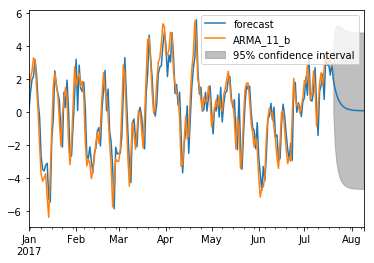

In [9]:
import datetime
fig = arma11.plot_predict(pd.to_datetime('2017-01-01'),
                        pd.to_datetime('2017-01-01')+datetime.timedelta(days=220), 
                          dynamic=False, plot_insample=True)
plt.show()

# 2.非平稳时间序列分析-ARIMA模型

In [22]:
from __future__ import print_function
import pandas as pd
import pandas as Series
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [23]:
#dta=ARIMA_11_b
ts_simu200= pd.read_csv('ts_simu200.csv',index_col='t')
dates=pd.date_range(start='2017/01/01', periods=200)
ts_simu200.set_index(dates, inplace=True)
dta=ts_simu200['ARIMA_110']

2017-01-01   -2.071533
2017-01-02   -2.189523
2017-01-03   -2.305250
2017-01-04   -2.390876
2017-01-05   -1.498416
Freq: D, Name: ARIMA_110, dtype: float64

In [24]:
#平稳性检验
result = adfuller(dta)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.897349
p-value: 0.333309


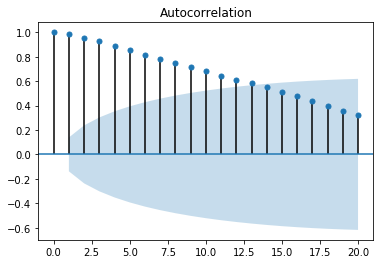

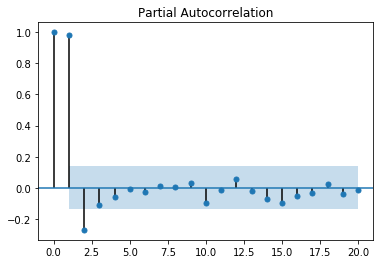

In [25]:
#原序列的自相关和偏自相关
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(dta,lags=20)
fig = sm.graphics.tsa.plot_pacf(dta,lags=20)
plt.show()
#print(dta)

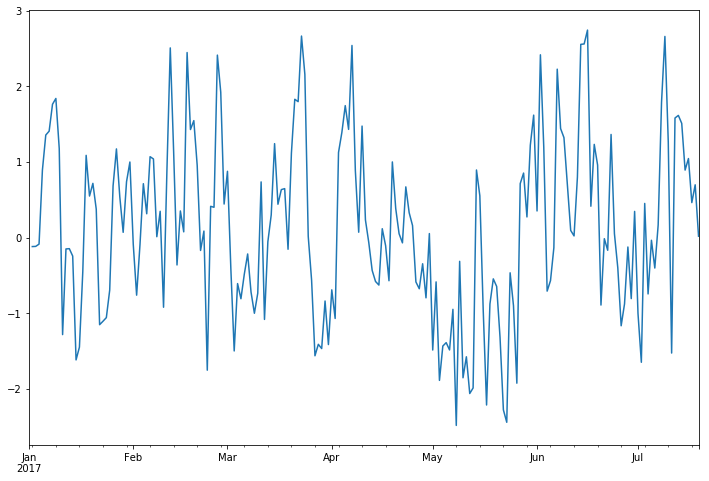

In [26]:
#差分序列的时序图
diff1= dta.diff(1)
diff1.plot(figsize=(12,8))
plt.show()

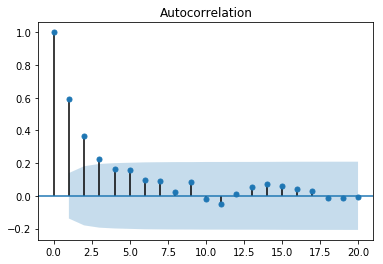

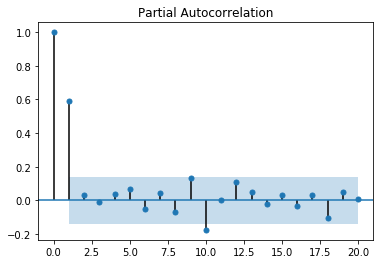

In [31]:
#差分序列的自相关和偏自相关图
ddta = diff1
ddta.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(ddta,lags=20)
fig = sm.graphics.tsa.plot_pacf(ddta,lags=20)
plt.show()

In [ ]:
arima110 = sm.tsa.ARIMA(dta,(1,1,0)).fit()

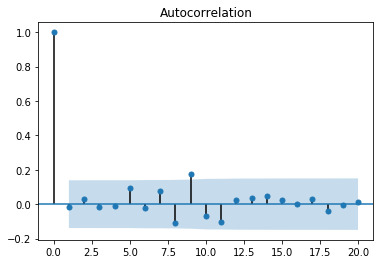

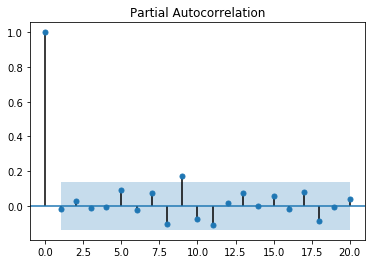

In [32]:
#检验下残差序列：
resid = arima110.resid
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=20)
fig = sm.graphics.tsa.plot_pacf(resid, lags=20)
plt.show()

2.03191685504
NormaltestResult(statistic=1.7533800073099775, pvalue=0.41615811630879496)


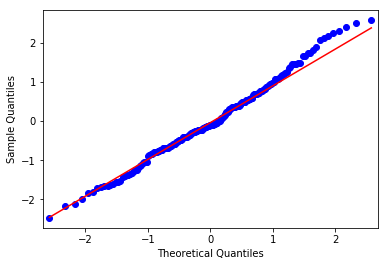

In [33]:
#残差的ACF和PACF图，可以看到序列残差基本为白噪声

#进一步进行D-W检验，是目前检验自相关性最常用的方法，但它只使用于检验一阶自相关性。
#DW＝４＜＝＞ρ＝－１　即存在负自相关性
#DW＝２＜＝＞ρ＝０　　即不存在（一阶）自相关性
#因此，当DW值显著的接近于O或４时，则存在自相关性，而接近于２时，则不存在（一阶）自相关性。

print(sm.stats.durbin_watson(arima110.resid.values))
#观察是否符合正态分布,这里使用QQ图，它用于直观验证一组数据是否来自某个分布，或者验证某两组数据是否来自同一（族）分布。
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
fig = qqplot(resid, line='q', fit=True)
plt.show()

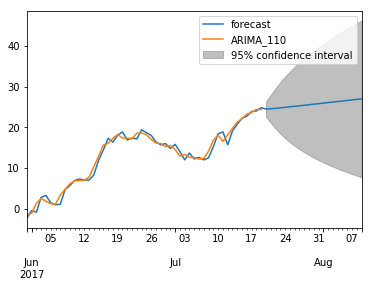

In [30]:
import datetime
fig = arima110.plot_predict(pd.to_datetime('2017-01-01')
                        pd.to_datetime('2017-01-01')+datetime.timedelta(days=220), 
                            dynamic=False, plot_insample=True)
plt.show()

# 3.自动寻找ARIMA参数

In [35]:
#dta=ARIMA_11_b
ts_simu200= pd.read_csv('ts_simu200.csv',index_col='t')
dates=pd.date_range(start='2017/01/01', periods=200)
ts_simu200.set_index(dates, inplace=True)
dta=ts_simu200['ARIMA_110']
dta.head()

2017-01-01   -2.071533
2017-01-02   -2.189523
2017-01-03   -2.305250
2017-01-04   -2.390876
2017-01-05   -1.498416
Freq: D, Name: ARIMA_110, dtype: float64

In [42]:
import warnings
import itertools
# 设置自相关(AR)、差分(I)、移动平均(MA)的三个参数的取值范围
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
# 忽略ARIMA模型无法估计出结果时的报警信息
import sys
warnings.filterwarnings("ignore")

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    try:
        temp_model = sm.tsa.ARIMA(dta,param)
        results = temp_model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = param_seasonal
    except:
        continue
        
print("Best ARIMA{} model - AIC:{}".format(best_pdq, best_aic))

Best ARIMA(1, 1, 0) model - AIC:545.9023842214676
